In [1]:
"""
Reading files from the given java folder path
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from math import radians, sin, cos, acos
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/nishit_dhakar/Desktop/Python/"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', '3months.csv', 'CountOccurance.ipynb', 'L2L3.csv', 'L2L3.ipynb', 'L2L3.xlsx', 'NonSAP_Tkt.csv', 'Original.ipynb', 'PMI_Detailed_Analysis_3_Months.xlsx', 'pmi_non_sap_23_May.ipynb', 'test.csv']


In [2]:
"""
Reading files from the given java folder path and using the encoding ISO-8859-1
"""

# Path of the file to read
pmi_file_path = 'C:/Users/nishit_dhakar/Desktop/Python/NonSAP_Tkt.csv'
#Read file from the csv
pmi_df = pd.read_csv(pmi_file_path ,encoding = 'ISO-8859-1')
pmi_df.shape

(85586, 16)

In [3]:
"""
Dropping of the un necessary columns. 
Finding the fields that were blank or dont have any data 
"""

pmi_df.isna().sum()
pmi_df=pmi_df.drop(['Urgency' ], axis=1)


In [4]:
pmi_df.isna().sum()

ï»¿Number              0
Short Description      0
Service                0
Description          173
Category               0
Impact                 0
Assignment Group       1
Close Code            17
Close Notes           43
Create Time            0
Resolve Time           0
SAP/Non-SAP            0
MTTR Days              0
MTTR Hours             0
MTTR Minutes           0
dtype: int64

In [5]:
"""
Cleanup of the field name to more short and relevent name
"""

pmi_df.rename(columns={'Number':'Number',
                       'Short Description':'short_description',
                          'Service':'service',
                        'Issue id':'issueid',
                           'Description' : 'description' ,
                           'Category' : 'category' ,
                       'Impact' : 'impact' ,
                       'Priority' : 'priority' ,
                       'Assignment Group' : 'assignment_group' ,
                       'Close Code' : 'close_code' ,
                       'Close Notes' : 'close_notes' ,
                       'Create Time': 'create_time' ,
                       'Resolve Time' : 'resolve_time' ,
                       'SAP/Non-SAP' : 'applicationtype' ,
                       'MTTR Days' : 'mttrdays',
                       'MTTR Hours' : 'mttrhours',
                       'MTTR Minutes' : 'mttrmins'
                      },  
                 inplace=True)

In [6]:
pmi_df.close_code.unique()

array(['Not Solved (Unable)', 'Solved (Permanently)',
       'Solved (Workaround)', 'Not Solved (Gone)', 'Solved (By User)',
       'Solved (By System)', 'Solved Remotely (Permanently)', nan],
      dtype=object)

In [7]:
pmi_df.head(1)

,ï»¿Number,short_description,service,description,category,impact,assignment_group,close_code,close_notes,create_time,resolve_time,applicationtype,mttrdays,mttrhours,mttrmins
0,SRQ#618,The Job pmi_erp_iqar_GCRS_Prod_Vol_am failed (...,IQAR Application for PMI,Alert Type: The Job pmi_erp_iqar_GCRS_Prod_Vol...,Complaint,None,Global Backlog Reduction Group,Not Solved (Unable),The Global Backlog Reduction exercise was perf...,12/2/2018 8:45,9/11/2019 11:04,non-SAP,203,1616.095914,292320


In [8]:
"""
modifying the date format to more usable format
"""

pmi_df.created_date = pd.to_datetime(pmi_df.create_time)
pmi_df.resolved_date = pd.to_datetime(pmi_df.resolve_time)

pmi_df["ticketcreatehour"]=pmi_df.created_date.dt.hour
pmi_df["ticketcreatemonth"]=pmi_df.created_date.dt.month
pmi_df["ticketcreateday"]=pmi_df.created_date.dt.day
pmi_df["ticketcreateyear"]=pmi_df.created_date.dt.year
pmi_df["ticketcreateweekday"] = pmi_df.created_date.dt.weekday

pmi_df['ticket_solving_duration'] = ((pmi_df.resolved_date  - pmi_df.created_date))/np.timedelta64(1,'h')

C:\Users\nishit_dhakar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\nishit_dhakar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


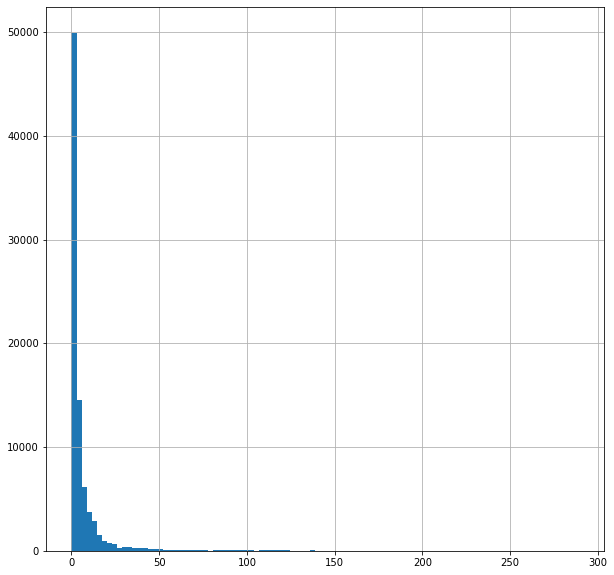

In [9]:
pmi_df.mttrdays.hist(bins=100,figsize=(10,10))

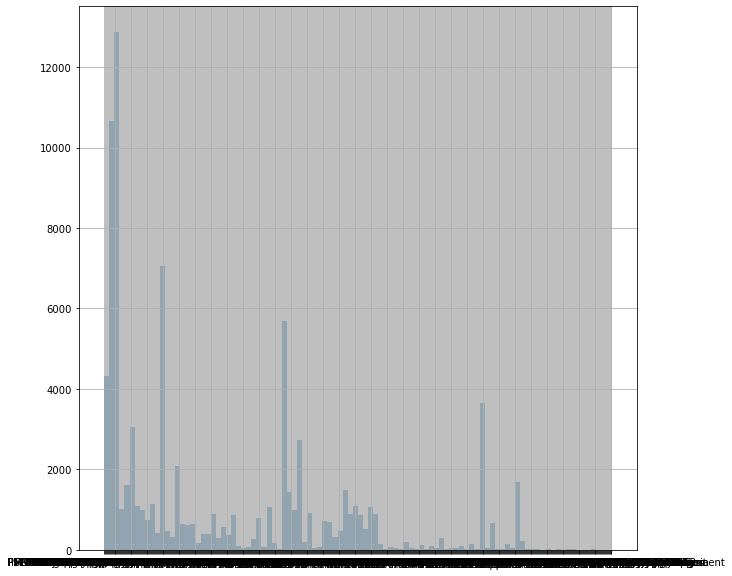

In [10]:
pmi_df.assignment_group.hist(bins=100,figsize=(10,10))

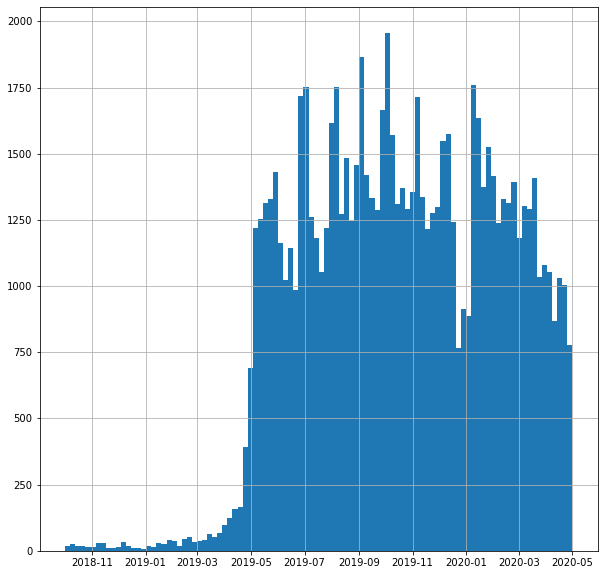

In [11]:
"""
Identifying the pattern of request generation pattern
"""
pmi_df.created_date.hist(bins=100,figsize=(10,10))

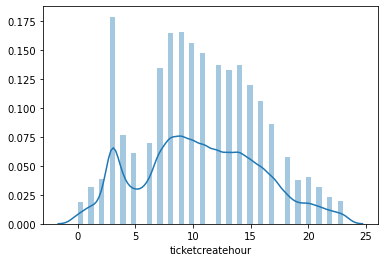

In [12]:
import seaborn as sns

sns.distplot(pmi_df.ticketcreatehour)


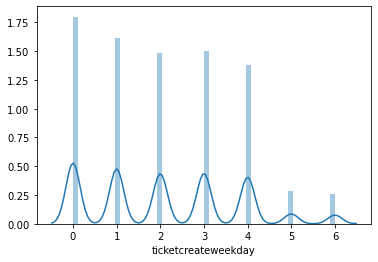

In [13]:
sns.distplot(pmi_df.ticketcreateweekday)

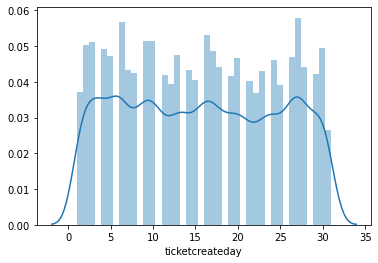

In [14]:

sns.distplot(pmi_df.ticketcreateday)

In [15]:
pmi_df.category.unique()

array(['Complaint', 'Incident', 'Request for Change',
       'Request for Information'], dtype=object)

In [16]:
pmi_df.close_code.value_counts()

Solved (Permanently)             74536
Solved (Workaround)               5791
Not Solved (Gone)                 3100
Not Solved (Unable)               1553
Solved (By User)                   325
Solved (By System)                 191
Solved Remotely (Permanently)       73
Name: close_code, dtype: int64

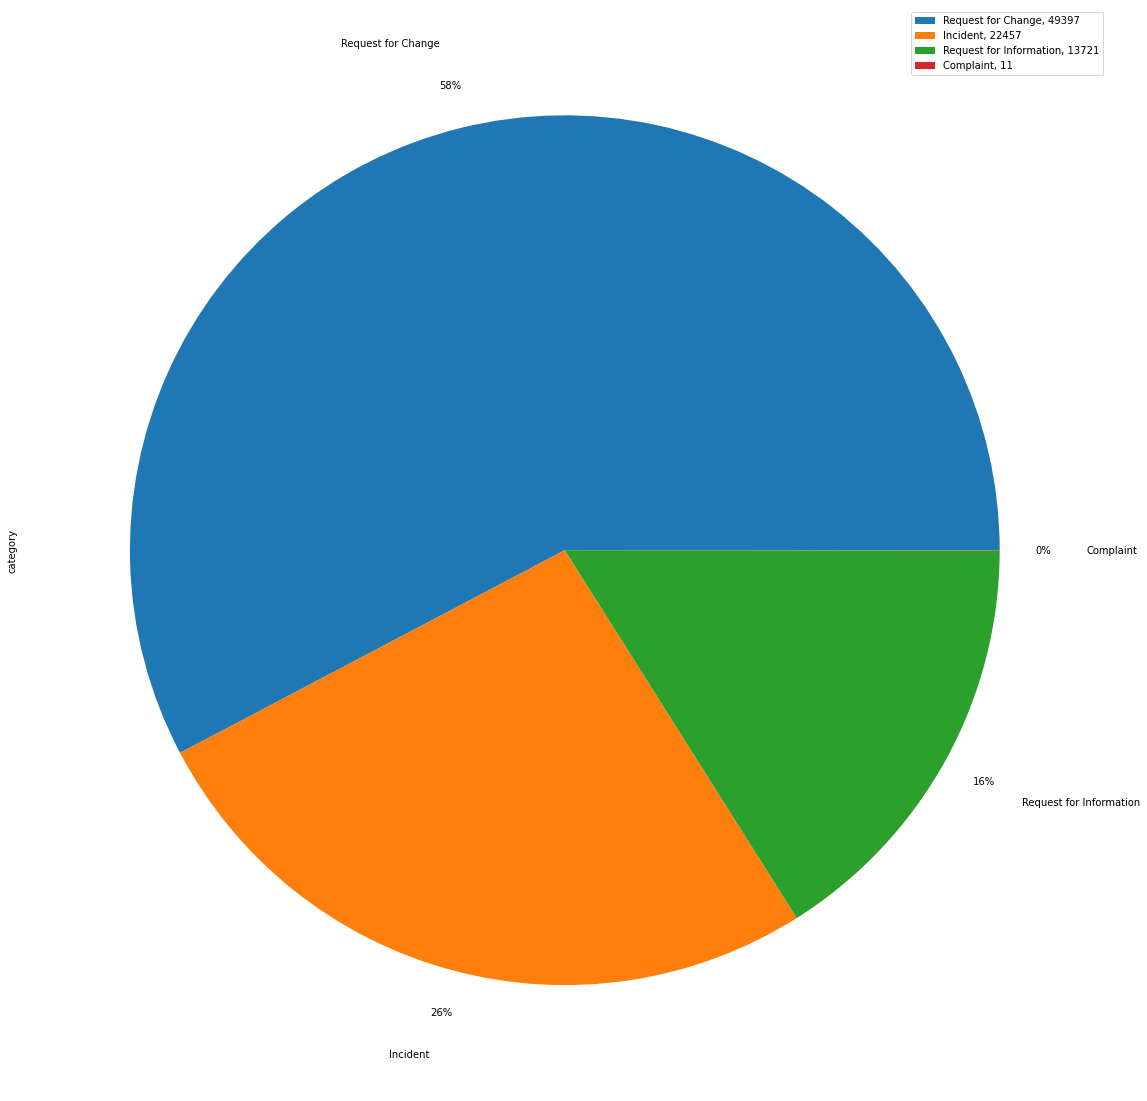

In [17]:
labels =pmi_df.category.value_counts().keys()
sizes = pmi_df.category.value_counts()
pmi_df.category.value_counts().plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [18]:
pmi_df.category.value_counts()


Request for Change         49397
Incident                   22457
Request for Information    13721
Complaint                     11
Name: category, dtype: int64

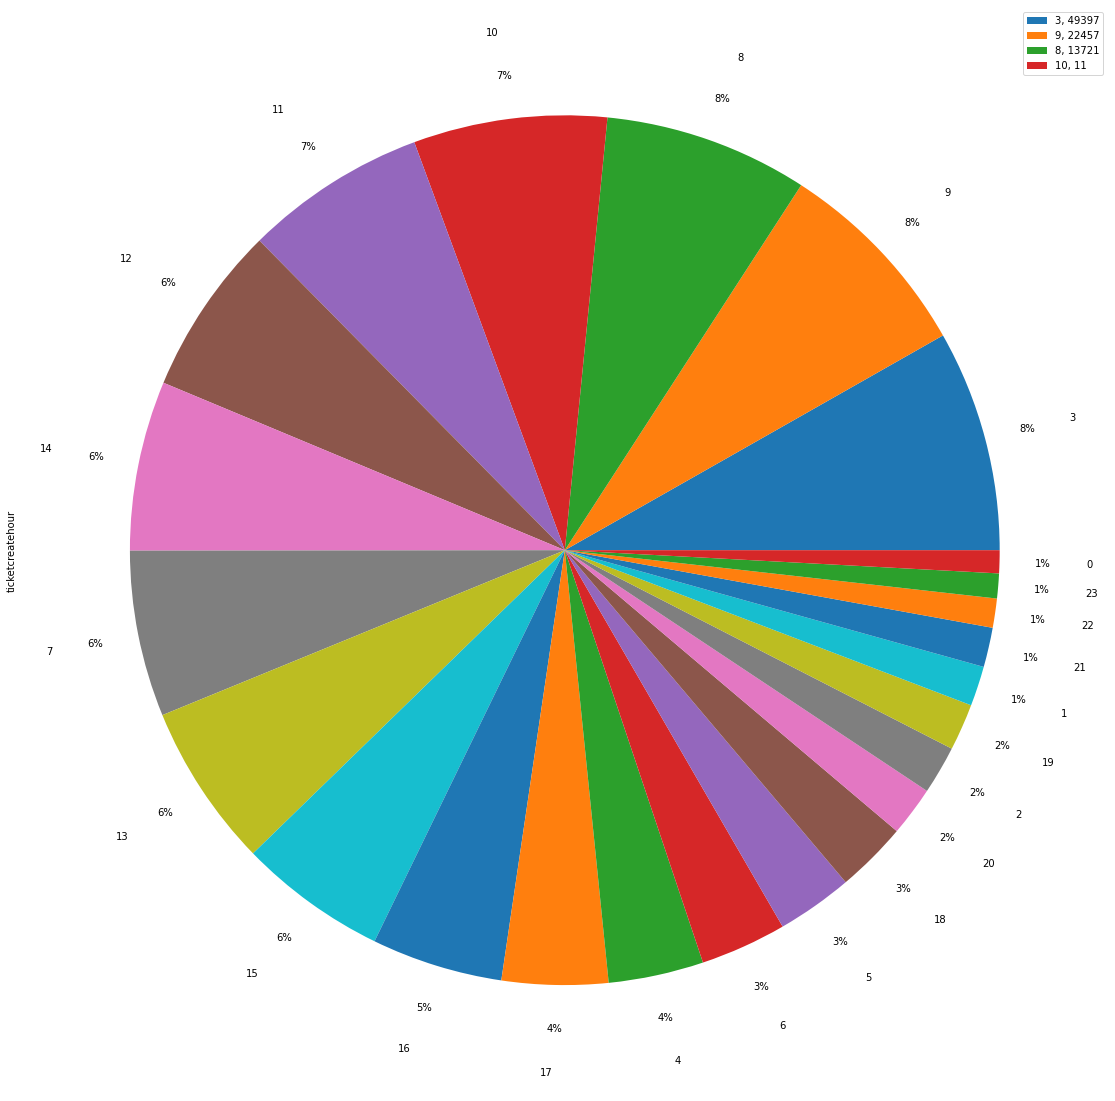

In [19]:
size= pmi_df.ticketcreatehour.value_counts()
labels = pmi_df.ticketcreatehour.value_counts().keys()

pmi_df.ticketcreatehour.value_counts().plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [20]:
seriesObj1 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 3 and x['ticketcreatehour']  < 10) else False , axis=1)
 
# Count number of True in series
numOfRows1 = len(seriesObj1[seriesObj1 == True].index)
 
print('Ticket count created at 3 CET and less than 12 CET  : ', numOfRows1)
#10286

seriesObj2 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 10 and x['ticketcreatehour']  < 19) else False , axis=1)
 
# Count number of True in series
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
 
print('Ticket count created at 10 CET and less than 19 CET  : ', numOfRows2)

seriesObj3 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 19 and x['ticketcreatehour']  < 24) else False , axis=1)
 
# Count number of True in series
numOfRows3 = len(seriesObj3[seriesObj3 == True].index)
 
print('Ticket count created at 19 CET and less than 24 CET  : : ', numOfRows3)

seriesObj4 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 0 and x['ticketcreatehour']  < 3) else False , axis=1)
 
# Count number of True in series
numOfRows4 = len(seriesObj4[seriesObj4 == True].index)
 
print('Ticket count created at 24 CET and less than 3 CET  : : ', numOfRows4)

sum1 = numOfRows1+ numOfRows2 + numOfRows3 + numOfRows4
print("total " , sum1)


Ticket count created at 3 CET and less than 12 CET  :  33527
Ticket count created at 10 CET and less than 19 CET  :  42493
Ticket count created at 19 CET and less than 24 CET  : :  6037
Ticket count created at 24 CET and less than 3 CET  : :  3529
total  85586


In [21]:
seriesObj1 = pmi_df.apply(lambda x: True if (x['mttrhours']  <= 8) else False , axis=1)
 
# Count number of True in series
numOfRows1 = len(seriesObj1[seriesObj1 == True].index)
 
print('Ticket count resolved in less than 1 day  : ', numOfRows1)
#10286

seriesObj2 = pmi_df.apply(lambda x: True if (x['mttrhours'] > 8 and x['mttrhours']  <= 16) else False , axis=1)
 
# Count number of True in series
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
 
print('Ticket count resolved in less than 2 day  : ', numOfRows2)

seriesObj3 = pmi_df.apply(lambda x: True if (x['mttrhours'] > 16 and x['mttrhours']  <= 40) else False , axis=1)
 
# Count number of True in series
numOfRows3 = len(seriesObj3[seriesObj3 == True].index)
 
print('Ticket count resolved in less than 5 day  : ', numOfRows3)

seriesObj4 = pmi_df.apply(lambda x: True if (x['mttrhours'] > 40 and x['mttrhours']  <= 80 ) else False , axis=1)
 
# Count number of True in series
numOfRows4 = len(seriesObj4[seriesObj4 == True].index)
 
print('Ticket count resolved in less than 10 day : ', numOfRows4)

seriesObj5 = pmi_df.apply(lambda x: True if (x['mttrhours'] > 80 ) else False , axis=1)
 
# Count number of True in series
numOfRows5 = len(seriesObj5[seriesObj5 == True].index)
 
print('Ticket count resolved in greater than 10 day : ', numOfRows5)

sum2 = numOfRows1+ numOfRows2 + numOfRows3 + numOfRows4 + numOfRows5
print("total " , sum2)

Ticket count resolved in less than 1 day  :  44447
Ticket count resolved in less than 2 day  :  9317
Ticket count resolved in less than 5 day  :  11925
Ticket count resolved in less than 10 day :  8085
Ticket count resolved in greater than 10 day :  11812
total  85586


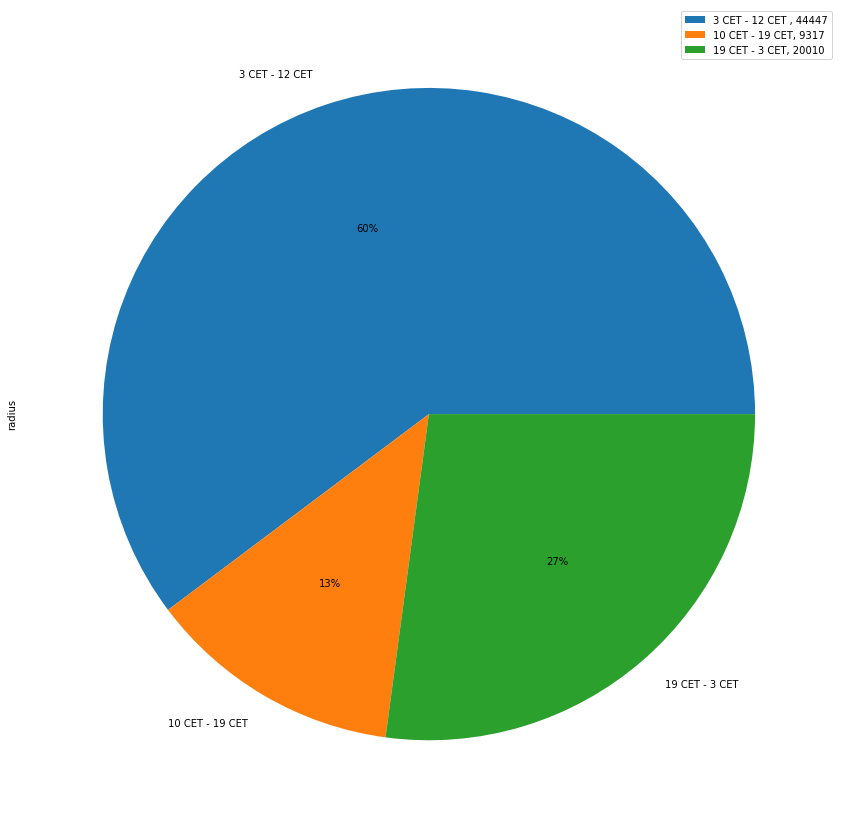

In [22]:
df = pd.DataFrame({
                   'radius': [numOfRows1, numOfRows2 , numOfRows3 + numOfRows4]},
                   index=['3 CET - 12 CET ', '10 CET - 19 CET', '19 CET - 3 CET']).plot(kind='pie',autopct='%1.0f%%',y='radius', figsize=(15, 15)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(['3 CET - 12 CET ', '10 CET - 19 CET', '19 CET - 3 CET'], [numOfRows1, numOfRows2 , numOfRows3 + numOfRows4])])

In [23]:
import re

def application_name(str,word_index):
    return(str[:word_index].strip())

pmi_df["service"] = pmi_df.service.apply(lambda x : application_name(x,x.find('Application')))

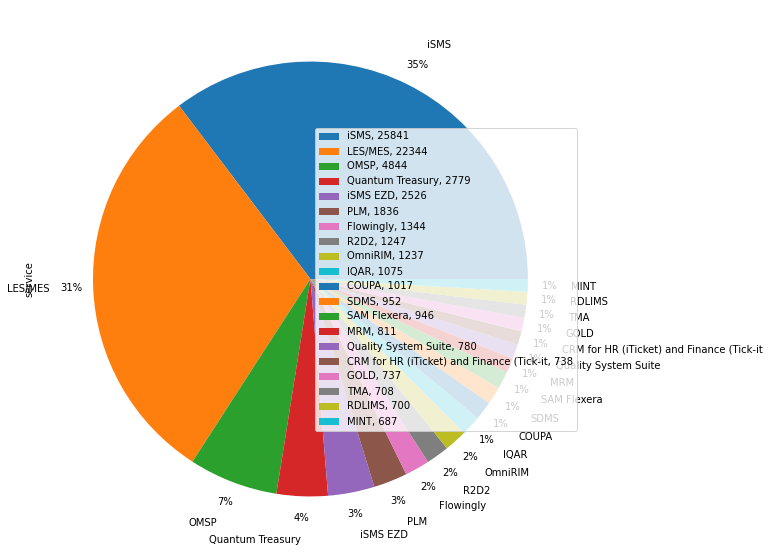

In [24]:
labels =pmi_df.service.value_counts().keys()
sizes = pmi_df.service.value_counts()


pmi_df.service.value_counts().nlargest(20).plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,
                                                figsize=(10,10)).legend( loc = 'right', 
                                                                        labels=['%s, %1.0f' % (l, s) for l, s in zip(labels,
                                                                                                                     sizes)])

In [25]:
pmi_df.service.value_counts().nlargest(20)

iSMS                                         25841
LES/MES                                      22344
OMSP                                          4844
Quantum Treasury                              2779
iSMS EZD                                      2526
PLM                                           1836
Flowingly                                     1344
R2D2                                          1247
OmniRIM                                       1237
IQAR                                          1075
COUPA                                         1017
SDMS                                           952
SAM Flexera                                    946
MRM                                            811
Quality System Suite                           780
CRM for HR (iTicket) and Finance (Tick-it      738
GOLD                                           737
TMA                                            708
RDLIMS                                         700
MINT                           

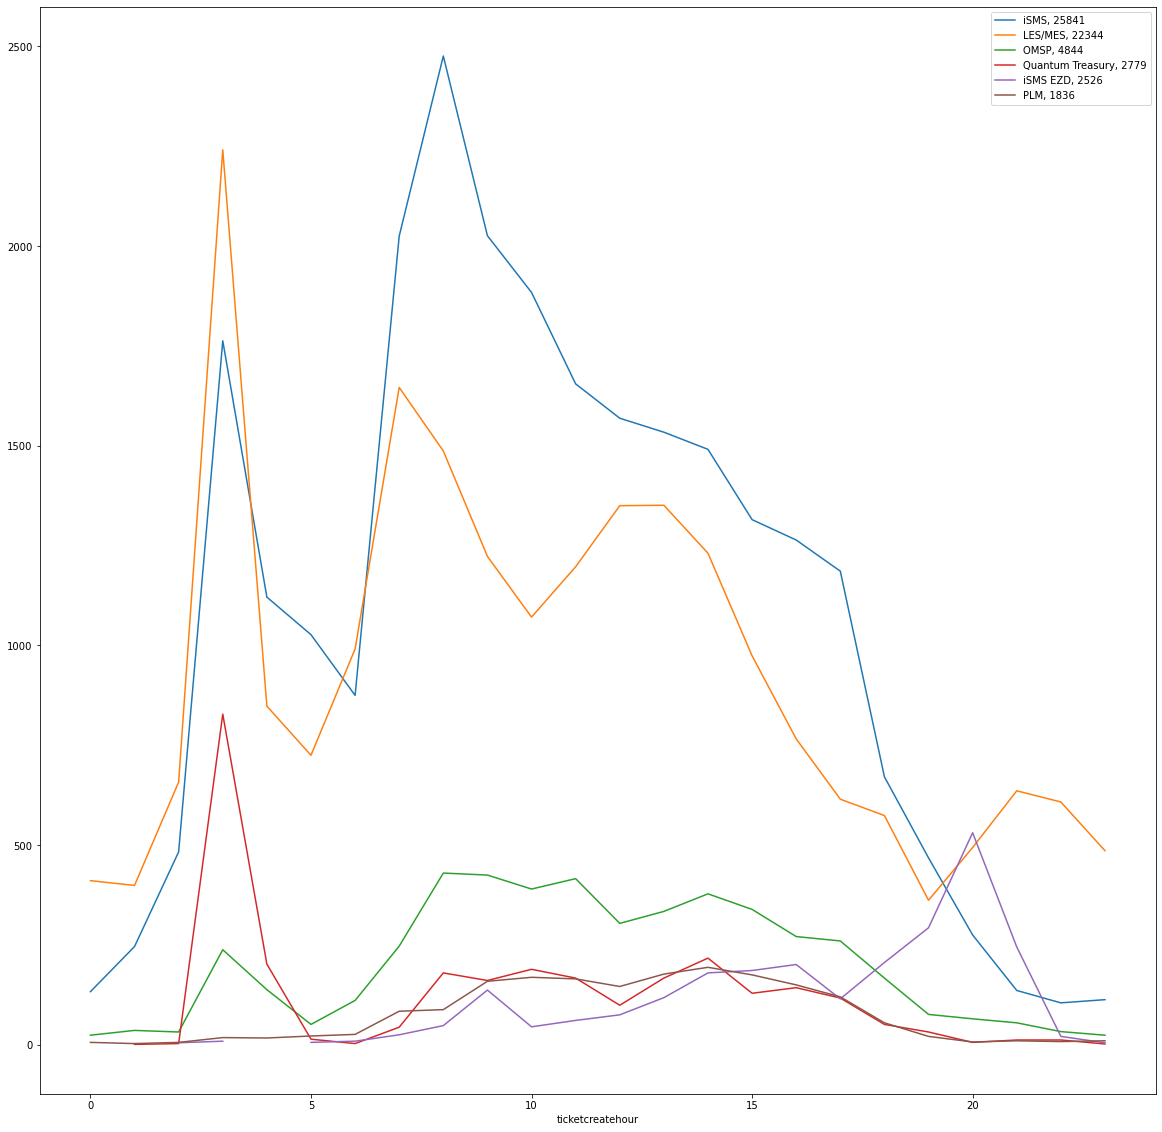

In [26]:

sizes= pmi_df.service.value_counts()
labels =  pmi_df.service.value_counts().keys() 


pmi_df.groupby(['ticketcreatehour','service' ])["service"].count().unstack().plot(y=['iSMS','LES/MES','OMSP'
                                                                                     ,'Quantum Treasury','iSMS EZD',
                                                                                     'PLM' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

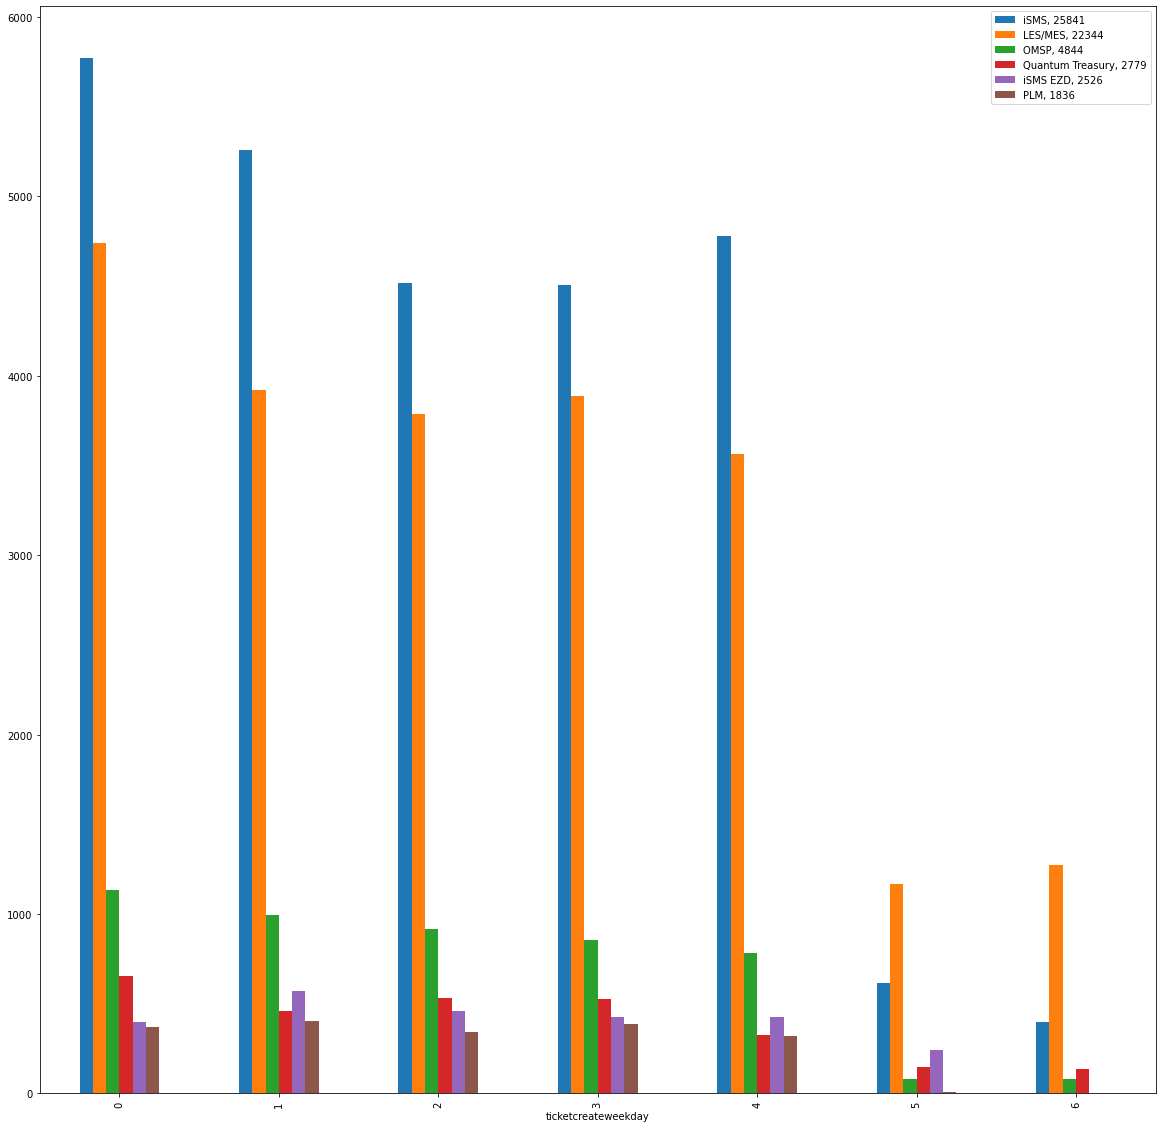

In [27]:

sizes= pmi_df.service.value_counts()
labels =  pmi_df.service.value_counts().keys() 


pmi_df.groupby(['ticketcreateweekday','service' ])["service"].count().unstack().plot(y=['iSMS','LES/MES',
                                                                                           'OMSP','Quantum Treasury','iSMS EZD',
                                                                                           'PLM'],kind='bar', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

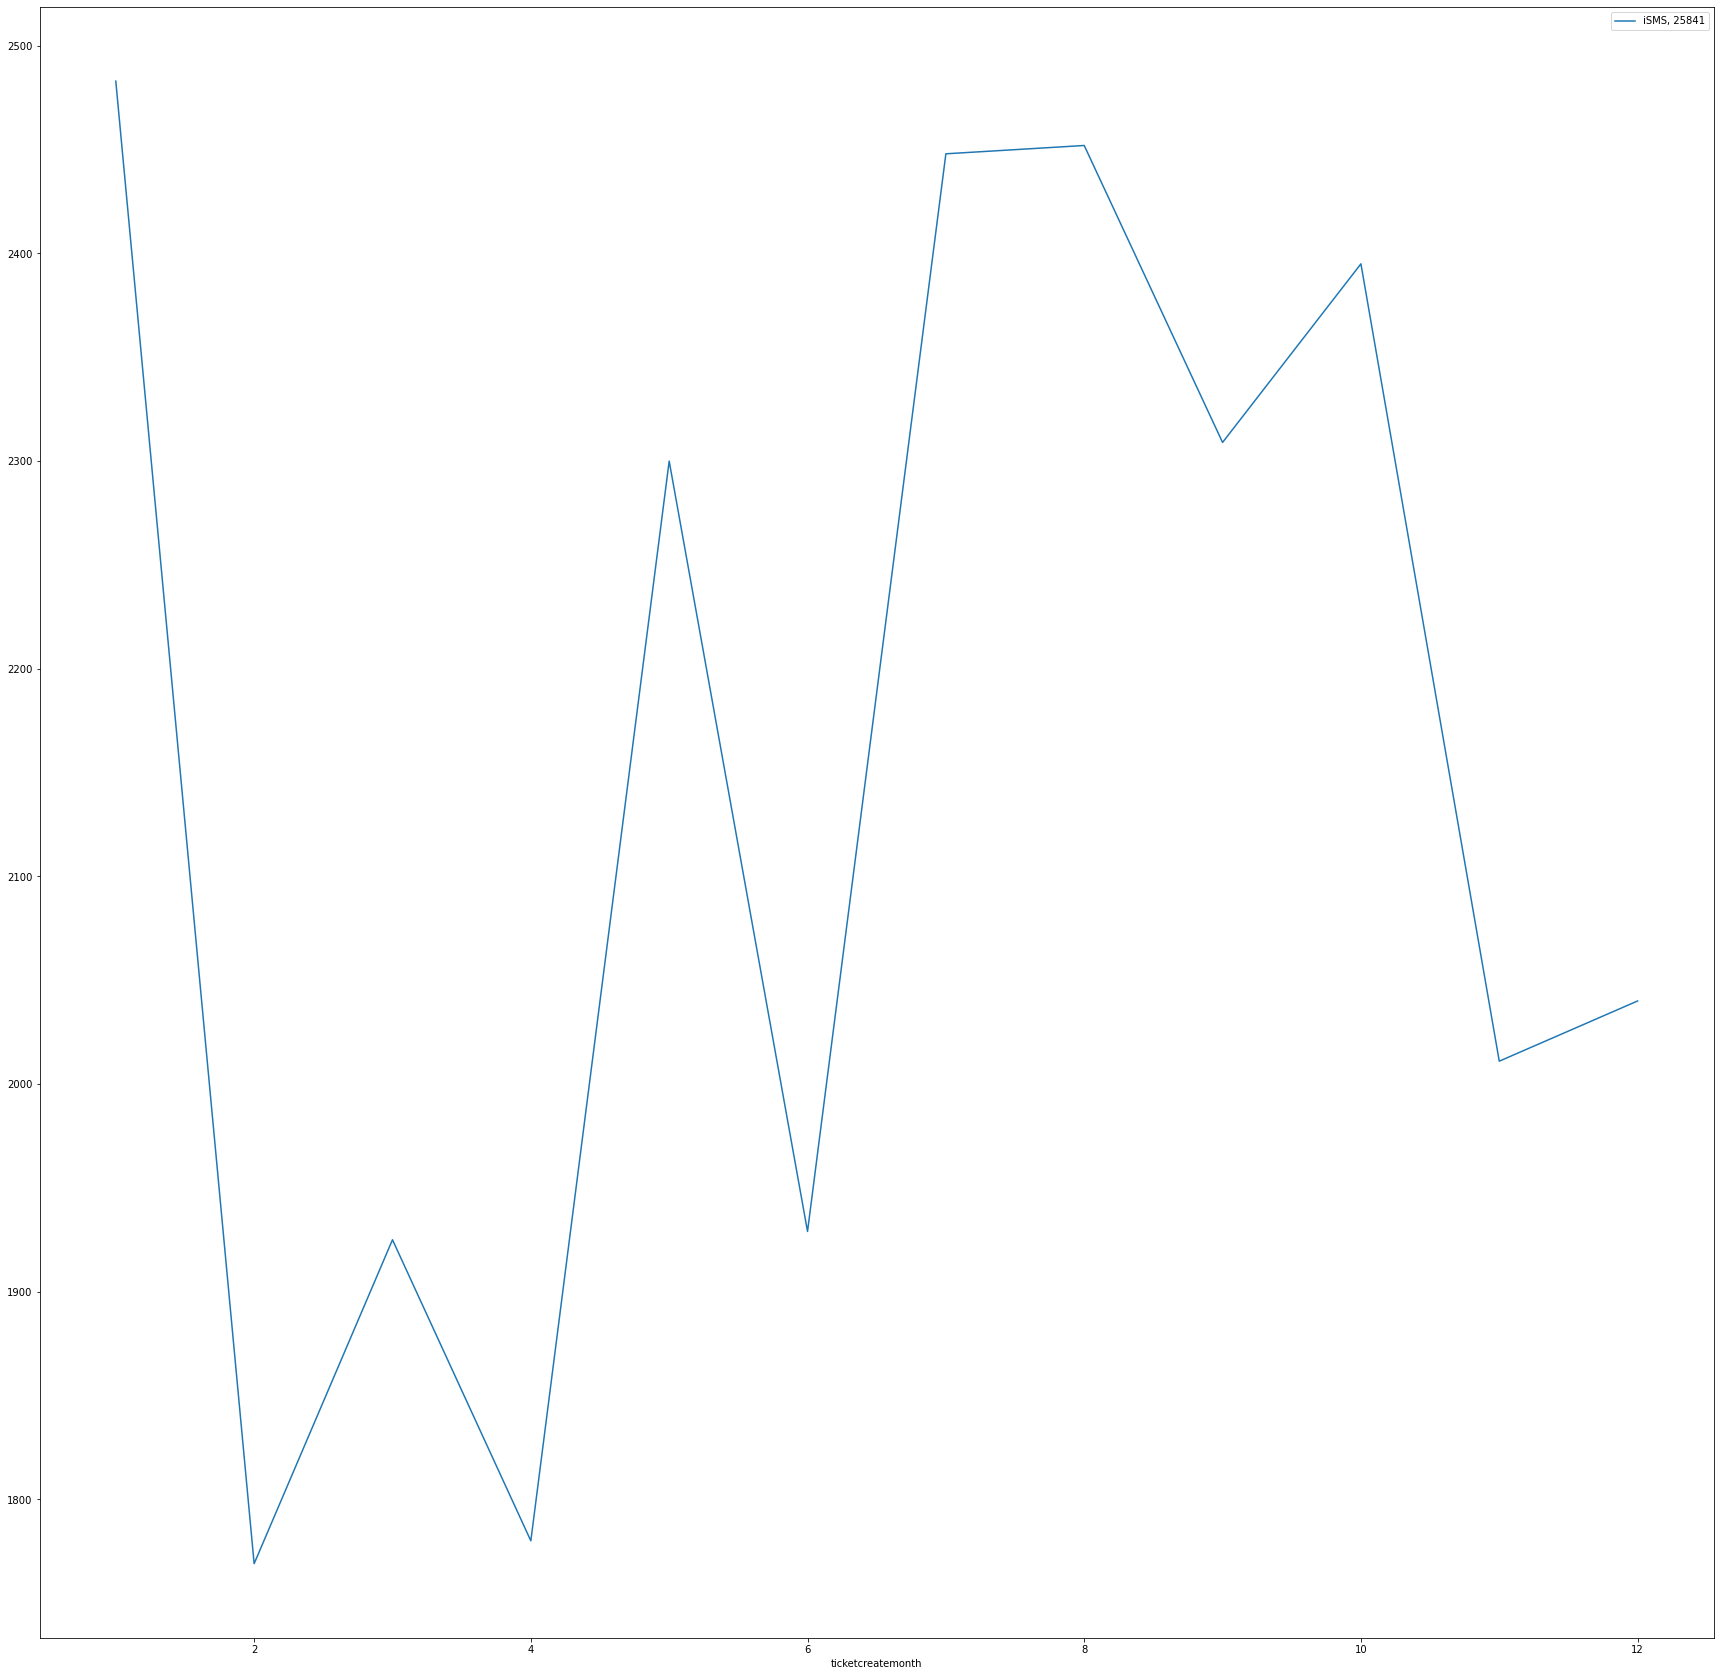

In [28]:
pmi_spriklr=pmi_df[pmi_df["service"] == 'iSMS']
pmi_df[pmi_df["service"] == 'iSMS'].groupby(['ticketcreatemonth','service' ])["service"].count().unstack().plot(kind='line', stacked=False,figsize=(30,30)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(pmi_spriklr.service.value_counts().keys(),pmi_spriklr.service.value_counts() )])

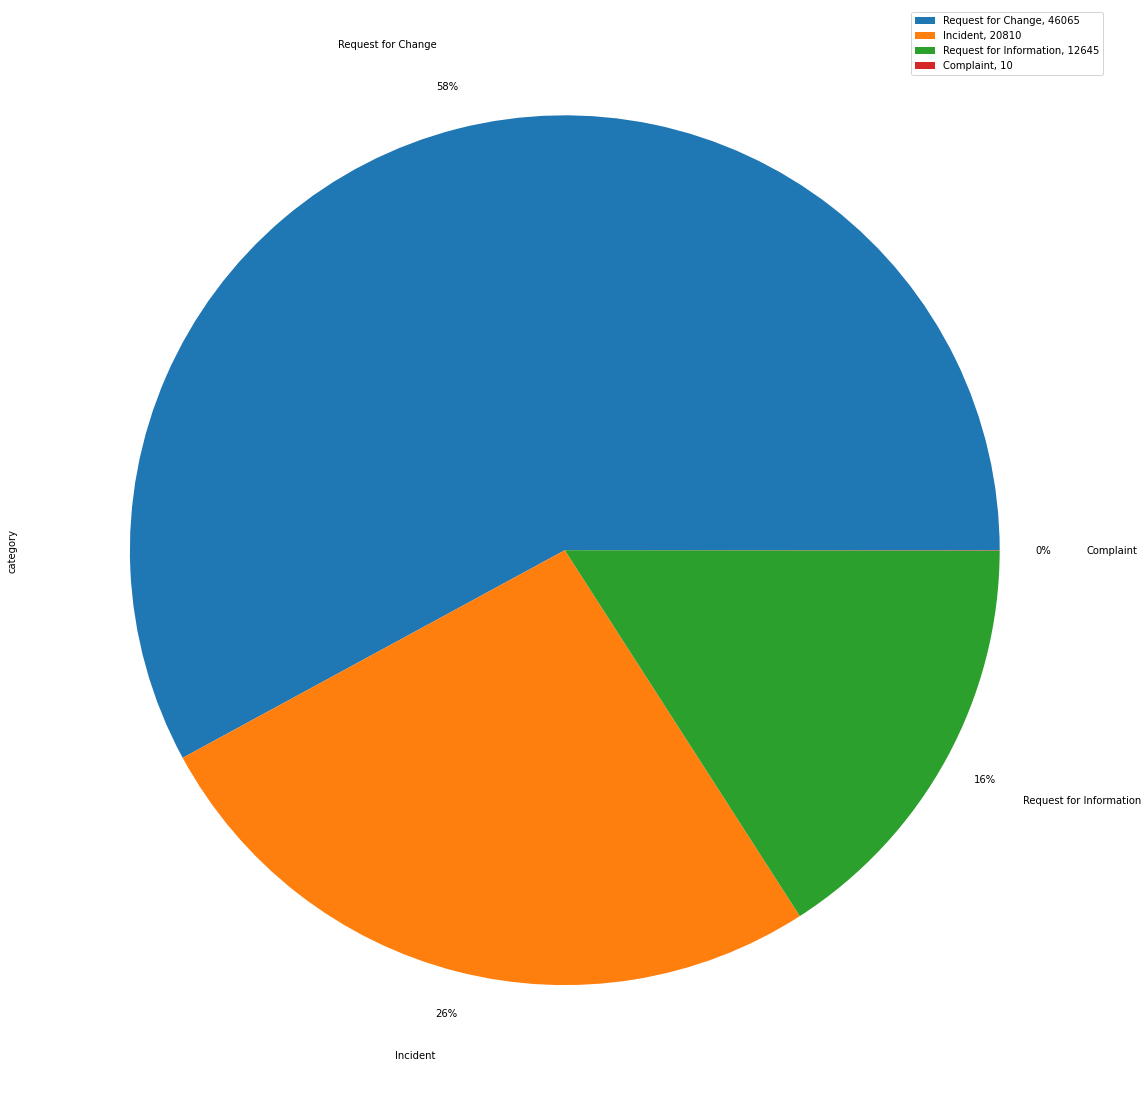

In [29]:
pmi_df_nojune = pmi_df[pmi_df.ticketcreatemonth != 6]

label = pmi_df_nojune.category.value_counts().keys()
size = pmi_df_nojune.category.value_counts()
pmi_df_nojune.category.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

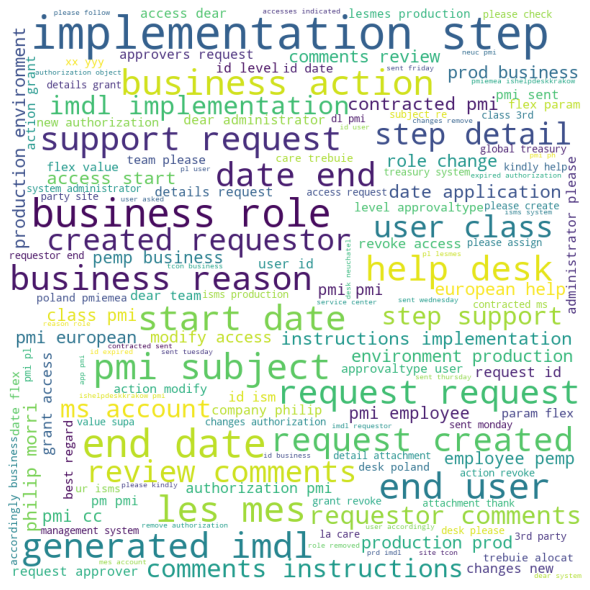

In [30]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in pmi_df.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [31]:
pmi_df.service.value_counts()

iSMS                   25841
LES/MES                22344
OMSP                    4844
Quantum Treasury        2779
iSMS EZD                2526
                       ...  
STA                        6
CTR                        5
ECP                        4
PMIMSS iSMS for PMC        3
iSMS Tobacco               1
Name: service, Length: 94, dtype: int64

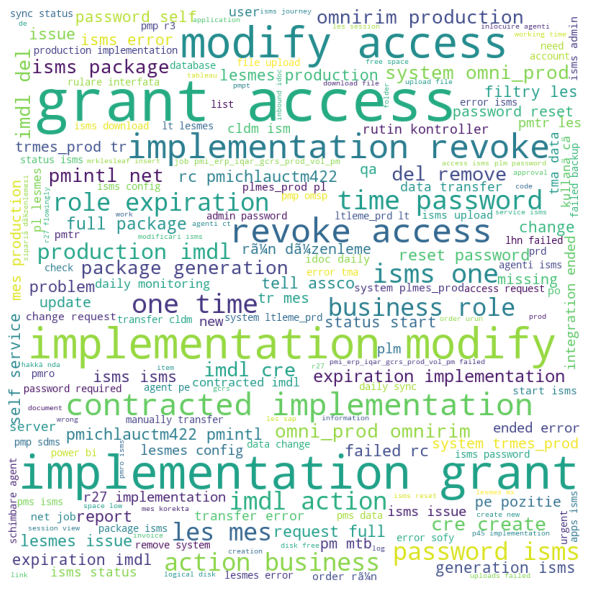

In [32]:
comment_words = '' 
stopwords = set(STOPWORDS) 

#pmi_mess_les=pmi_df[pmi_df.service == 'R2D2']

#pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Request for Information']


# iterate through the csv file 
#for val in pmi_mess_les_info.short_description: 
for val in pmi_df.short_description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

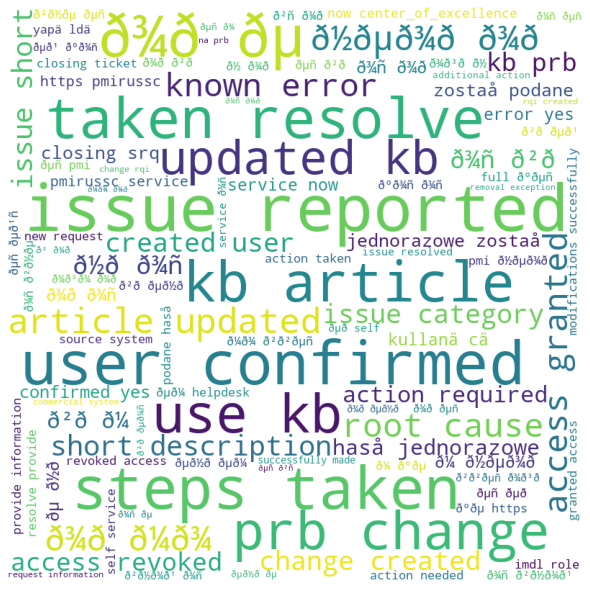

In [33]:
comment_words = '' 
stopwords = set(STOPWORDS) 

#pmi_mess_les=pmi_df[pmi_df.service == 'R2D2']
#
#pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Incident']


# iterate through the csv file 
#for val in pmi_mess_les_info.short_description: 
for val in pmi_df.close_notes: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

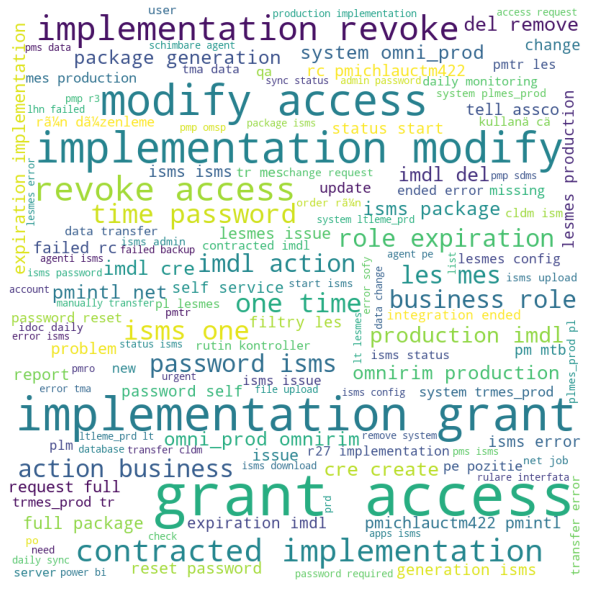

In [34]:
comment_words = '' 
stopwords = set(STOPWORDS) 

#pmi_mess_les=pmi_df[pmi_df.service == 'R2D2']

#pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Request for Change']


# iterate through the csv file 
for val in pmi_df.short_description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [35]:
from collections import Counter
import nltk
#nltk.download('punkt')

#r1 = pmi_df.short_description.values
r1 = pmi_df.close_notes.values

final_string = "";
for value in r1:
    final_string = final_string  + value + " ";

TypeError: can only concatenate str (not "float") to str

In [ ]:
stopwords = [' ','the','a', 'about', 'above', 'across', 'after', 'afterwards','again', 'against', 'all', 'almost', 'alone', 'along','already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another','any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['in','.', 'to', 'the', 'of', 'on', 'for','any', 'with', 'is', 'no',':', '[', ']']
stopwords += ['why','what', 'did', 'use', 'no', 'has', 'yes','who', 'where', 'goes', 'as','an', 'how']
stopwords += ['kindly','.', 'all', 'time', 'feel', 'thank', '"','>', '<', 'from', '&','let', '(', ')','|']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became','because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below','beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant','co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due','during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever','every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first','five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give','go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers','herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed','interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made','many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much','must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none','noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or','other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please','put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should','show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime','sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves','then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they','thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to','together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon','us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where','whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who','whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your','yours', 'yourself', 'yourselves']



In [ ]:
# Given a list of words, remove any that are
# in a list of stop words.

def removeStopwords(wordlist, stopwords):
    #wordlist((k.lower(), v) for k,v in {'My Key':'My Value'}.items())
    newList = list(map(lambda x: x.lower(), wordlist))
    return [w for w in newList if w not in stopwords]

In [ ]:
from nltk.tokenize import word_tokenize
wordlist = word_tokenize(final_string)
refwordlist= removeStopwords(wordlist, stopwords)
#finalList = refwordlist.sort(reverse=True)
#finalList= sortFreqDict(refwordlist)


In [ ]:
result =Counter(" ".join(refwordlist).split(" ")).items()

import csv
with open('test.csv', 'w', encoding='utf-8') as f:
    for k,v in result:
        f.write("%s,%s\n"%(k,v))